# Feature Engineering

In [1]:
#importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [2]:
df=pd.read_csv('sale_saocarlos.csv')
df.head()

,namCategory,namCondominium,namDistrict,namStreet,namSubCategory,prop_char_1,prop_char_2,prop_char_5,prop_char_176,prop_char_12,totalRooms,valSales,idtProperty,latitude,totalAccess,flgHighlight,idtExternal,valMonthIptu,valCondominium,prop_char_95
0,Casas,spazio mont royal,núcleo residencial silvio vilari,rua vivaldo lanzoni,Padrão,237.0,250.0,4.0,2.0,2.0,6.0,585000.0,66771,-22.026810,4,0,17045.0,0.0,0.0,47.81
1,Casas,condomínio village damha iv,village damha iv,avenida brasilino damha,Padrão,180.0,299.0,3.0,4.0,2.0,6.0,1150000.0,66762,-21.975280,10,0,17045.0,0.0,0.0,47.81
2,Terreno,spazio mont royal,vila são josé,rua hipólito josé da costa,Lote,147.8,125.0,2.0,2.0,1.0,3.0,150000.0,66761,-22.002180,3,0,17045.0,0.0,0.0,47.81
3,Apartamentos,edifício mont d'oro,residencial monsenhor romeu tortorelli,avenida joão stella,Padrão,147.8,42.0,2.0,1.0,1.0,2.0,180000.0,66758,-22.010408,23,1,17045.0,0.0,233.0,42.00
4,Casas,spazio mont royal,jardim tangará,rua ilton resitano,Padrão,111.0,125.0,2.0,2.0,2.0,3.0,290000.0,66756,-22.010460,23,1,17045.0,0.0,0.0,47.81


In [3]:
#shape
df.shape

(6548, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   namCategory     6548 non-null   object 
 1   namCondominium  6548 non-null   object 
 2   namDistrict     6548 non-null   object 
 3   namStreet       6548 non-null   object 
 4   namSubCategory  6548 non-null   object 
 5   prop_char_1     6548 non-null   float64
 6   prop_char_2     6548 non-null   float64
 7   prop_char_5     6548 non-null   float64
 8   prop_char_176   6548 non-null   float64
 9   prop_char_12    6548 non-null   float64
 10  totalRooms      6548 non-null   float64
 11  valSales        6548 non-null   float64
 12  idtProperty     6548 non-null   int64  
 13  latitude        6548 non-null   float64
 14  totalAccess     6548 non-null   int64  
 15  flgHighlight    6548 non-null   int64  
 16  idtExternal     6548 non-null   float64
 17  valMonthIptu    6548 non-null   f

### Duplicated Value

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(6548, 20)

### Checking Null values

In [7]:
df.isna().sum()

namCategory       0
namCondominium    0
namDistrict       0
namStreet         0
namSubCategory    0
prop_char_1       0
prop_char_2       0
prop_char_5       0
prop_char_176     0
prop_char_12      0
totalRooms        0
valSales          0
idtProperty       0
latitude          0
totalAccess       0
flgHighlight      0
idtExternal       0
valMonthIptu      0
valCondominium    0
prop_char_95      0
dtype: int64

### RENAMING COLUMNS

In [8]:
df.columns

Index(['namCategory', 'namCondominium', 'namDistrict', 'namStreet',
       'namSubCategory', 'prop_char_1', 'prop_char_2', 'prop_char_5',
       'prop_char_176', 'prop_char_12', 'totalRooms', 'valSales',
       'idtProperty', 'latitude', 'totalAccess', 'flgHighlight', 'idtExternal',
       'valMonthIptu', 'valCondominium', 'prop_char_95'],
      dtype='object')

In [9]:
df.rename(columns={'namCategory':'Category',
                   'namCondominium':'Condominium',
                   'namDistrict':'District',
                   'namStreet':'Street_name',
                  'namSubCategory':'Subcategory','prop_char_1':'Built_up_area',
                  'prop_char_2':'Total_area',
                  'prop_char_5':'Bedroom',
                  'prop_char_176':'Bathroom',
                  'prop_char_12':'Garages',
                  'valSales':'Sales_value',
                  'idtProperty':'PropertyId',
                  'idtExternal':'ExternalId',
                  'valMonthIptu':'Property_tax'},inplace=True)

In [10]:
df.head()

,Category,Condominium,District,Street_name,Subcategory,Built_up_area,Total_area,Bedroom,Bathroom,Garages,totalRooms,Sales_value,PropertyId,latitude,totalAccess,flgHighlight,ExternalId,Property_tax,valCondominium,prop_char_95
0,Casas,spazio mont royal,núcleo residencial silvio vilari,rua vivaldo lanzoni,Padrão,237.0,250.0,4.0,2.0,2.0,6.0,585000.0,66771,-22.026810,4,0,17045.0,0.0,0.0,47.81
1,Casas,condomínio village damha iv,village damha iv,avenida brasilino damha,Padrão,180.0,299.0,3.0,4.0,2.0,6.0,1150000.0,66762,-21.975280,10,0,17045.0,0.0,0.0,47.81
2,Terreno,spazio mont royal,vila são josé,rua hipólito josé da costa,Lote,147.8,125.0,2.0,2.0,1.0,3.0,150000.0,66761,-22.002180,3,0,17045.0,0.0,0.0,47.81
3,Apartamentos,edifício mont d'oro,residencial monsenhor romeu tortorelli,avenida joão stella,Padrão,147.8,42.0,2.0,1.0,1.0,2.0,180000.0,66758,-22.010408,23,1,17045.0,0.0,233.0,42.00
4,Casas,spazio mont royal,jardim tangará,rua ilton resitano,Padrão,111.0,125.0,2.0,2.0,2.0,3.0,290000.0,66756,-22.010460,23,1,17045.0,0.0,0.0,47.81


### DROPPING COLUMNS

Dropping columsn which can easily does not contribute for prediction

In [11]:
df.columns

Index(['Category', 'Condominium', 'District', 'Street_name', 'Subcategory',
       'Built_up_area', 'Total_area', 'Bedroom', 'Bathroom', 'Garages',
       'totalRooms', 'Sales_value', 'PropertyId', 'latitude', 'totalAccess',
       'flgHighlight', 'ExternalId', 'Property_tax', 'valCondominium',
       'prop_char_95'],
      dtype='object')

In [12]:
df=df.drop(columns=['PropertyId','PropertyId','flgHighlight','ExternalId','latitude'])

In [13]:
df.head(3)

,Category,Condominium,District,Street_name,Subcategory,Built_up_area,Total_area,Bedroom,Bathroom,Garages,totalRooms,Sales_value,totalAccess,Property_tax,valCondominium,prop_char_95
0,Casas,spazio mont royal,núcleo residencial silvio vilari,rua vivaldo lanzoni,Padrão,237.0,250.0,4.0,2.0,2.0,6.0,585000.0,4,0.0,0.0,47.81
1,Casas,condomínio village damha iv,village damha iv,avenida brasilino damha,Padrão,180.0,299.0,3.0,4.0,2.0,6.0,1150000.0,10,0.0,0.0,47.81
2,Terreno,spazio mont royal,vila são josé,rua hipólito josé da costa,Lote,147.8,125.0,2.0,2.0,1.0,3.0,150000.0,3,0.0,0.0,47.81


In [14]:
df.shape

(6548, 16)

###  HANDLING OUTLIERS

In [15]:
cols=df.columns
num_cols=[]

for i in cols:
    if df[i].dtype!='O':
        num_cols.append(i)
num_cols

['Built_up_area',
 'Total_area',
 'Bedroom',
 'Bathroom',
 'Garages',
 'totalRooms',
 'Sales_value',
 'totalAccess',
 'Property_tax',
 'valCondominium',
 'prop_char_95']

CHECKING BOXPLOT AND KDE DISTRIBUTION BEFORE OUTLIER HANDLING

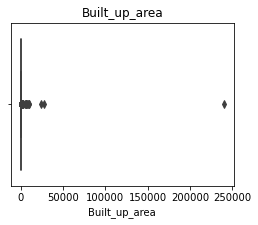

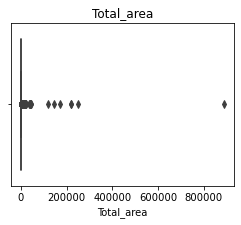

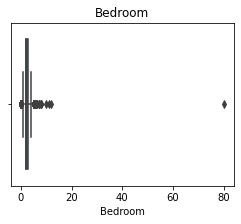

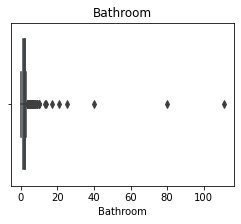

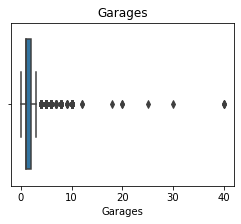

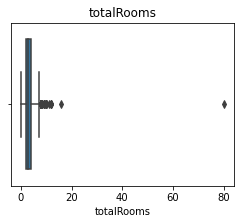

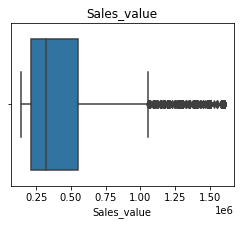

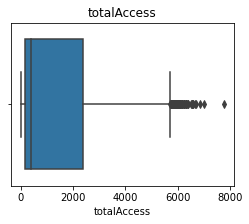

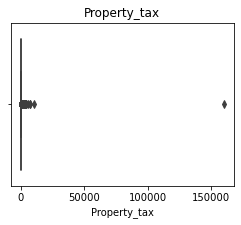

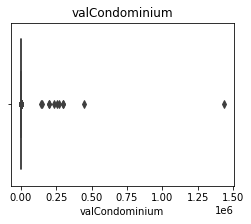

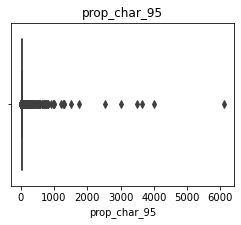

In [16]:
for i in num_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[i])
    plt.title(i)
plt.show()

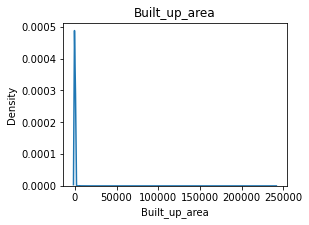

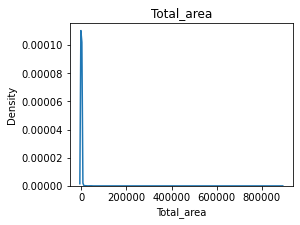

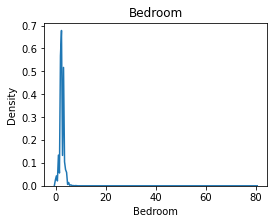

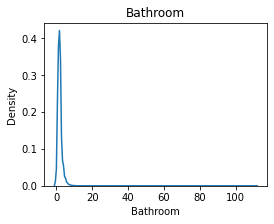

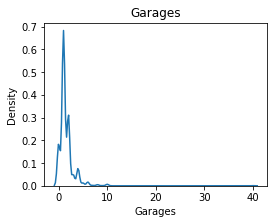

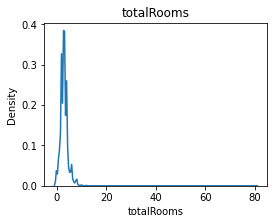

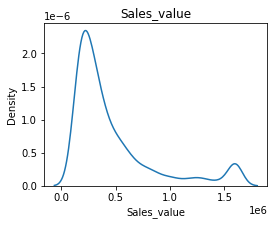

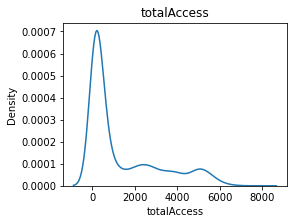

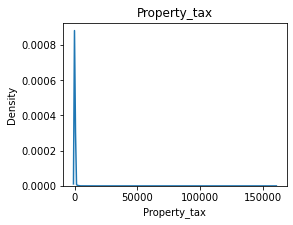

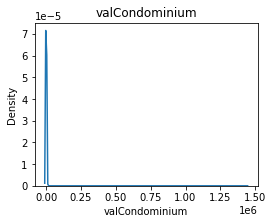

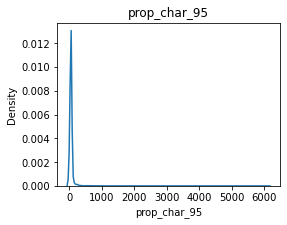

In [17]:
for i in num_cols:
    plt.figure(figsize=(4,3))
    sns.kdeplot(df[i])
    plt.title(i)
plt.show()

### CAPPING

In [18]:
for i in num_cols:
    UL=df[i].quantile(0.95)
    LL=df[i].quantile(0.05)
    df[i]=np.where(df[i]>=UL,UL,np.where(df[i]<=LL,LL,df[i]))

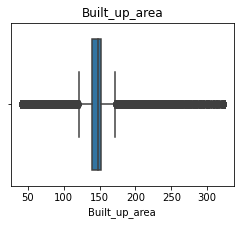

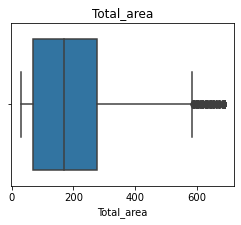

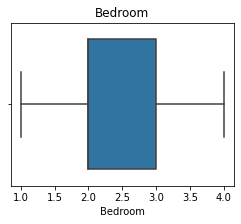

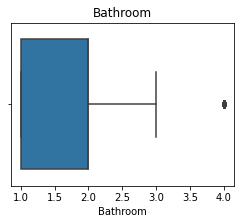

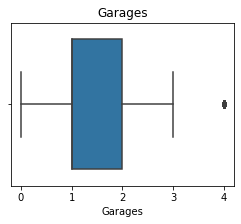

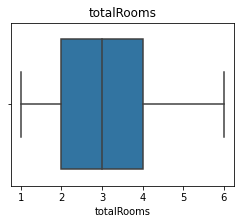

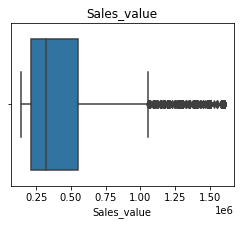

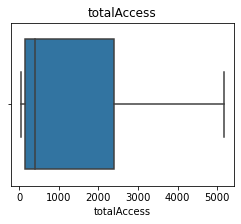

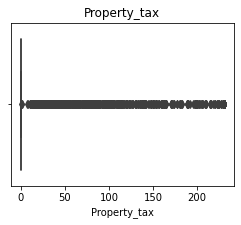

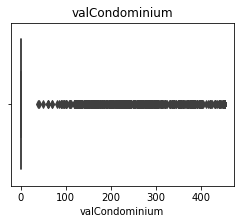

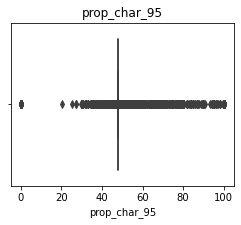

In [19]:
for i in num_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[i])
    plt.title(i)
plt.show()

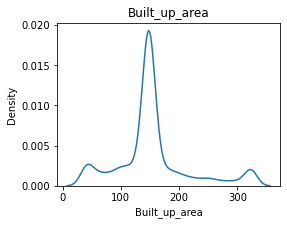

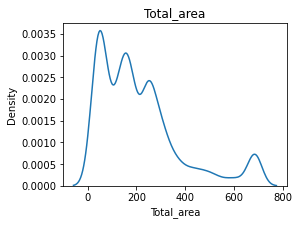

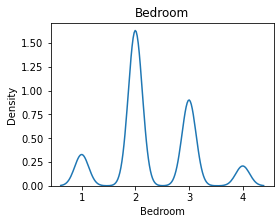

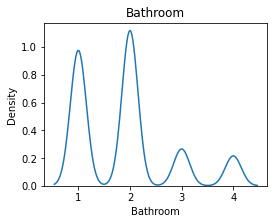

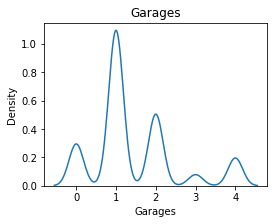

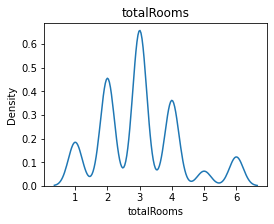

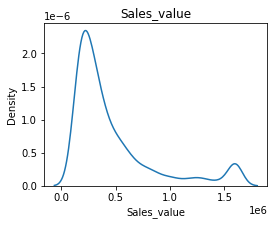

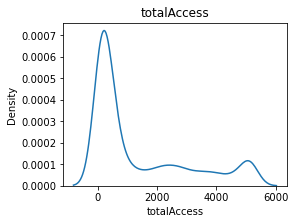

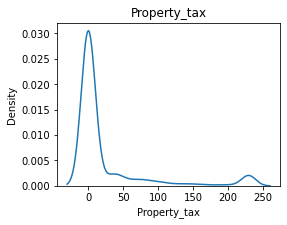

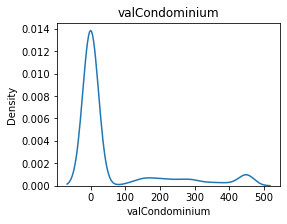

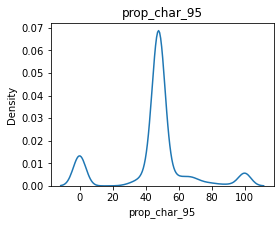

In [20]:
for i in num_cols:
    plt.figure(figsize=(4,3))
    sns.kdeplot(df[i])
    plt.title(i)
plt.show()

Although we have still outliers but the distribution has been handled in comparison to previous distribution

## Feature Selection

In this we will Select best features for the Prediction.Selection is made based on visualizing and statistical strength analysis.

### A-visualizing features
* continous vs continous - scatter plot
* categorical vs continous - Box plot
* categorical and categoirical - grouped bar charts

### B-Statistical Measurement
* continous vs continous - core-lation matrix
* continous vs categorical- Anova
* categorical vs categorical -Chi square of independence

### In our case
* Continous target variable vs contnuous predictor variable
* Continous target variable vs caegroical predictor variabe;

#### Continous target variable vs continous predictor variable

In [21]:
cols
num_col=['Built_up_area','Total_area', 'Bedroom', 'Bathroom', 'Garages','totalRooms', 'totalAccess','Property_tax','valCondominium', 'prop_char_95']

In [22]:
num_cols

['Built_up_area',
 'Total_area',
 'Bedroom',
 'Bathroom',
 'Garages',
 'totalRooms',
 'Sales_value',
 'totalAccess',
 'Property_tax',
 'valCondominium',
 'prop_char_95']

In [23]:
#for i in num_cols:
#    plt.figure(figsize=(4,4))
#    sns.scatterplot(data=df,x=i,y='Sales_value')
#plt.show()

#### Statistical strength 

In [24]:
df.corr()

,Built_up_area,Total_area,Bedroom,Bathroom,Garages,totalRooms,Sales_value,totalAccess,Property_tax,valCondominium,prop_char_95
Built_up_area,1.000000,0.373780,0.463710,0.446698,0.284501,0.484536,0.471730,-0.024468,0.137777,0.019543,0.028965
Total_area,0.373780,1.000000,0.262602,0.367357,0.256018,0.345264,0.610663,-0.008918,0.068879,-0.195618,-0.058328
Bedroom,0.463710,0.262602,1.000000,0.592071,0.403814,0.871410,0.433544,0.059099,0.174984,-0.001394,0.110020
Bathroom,0.446698,0.367357,0.592071,1.000000,0.342242,0.799915,0.525503,0.015086,0.171485,-0.008705,0.140907
Garages,0.284501,0.256018,0.403814,0.342242,1.000000,0.419400,0.363689,-0.251919,0.095634,0.021054,0.266269
totalRooms,0.484536,0.345264,0.871410,0.799915,0.419400,1.000000,0.533738,0.001418,0.170322,0.019719,0.177256
Sales_value,0.471730,0.610663,0.433544,0.525503,0.363689,0.533738,1.000000,-0.052183,0.180217,0.043428,0.128689
totalAccess,-0.024468,-0.008918,0.059099,0.015086,-0.251919,0.001418,-0.052183,1.000000,0.077894,-0.144990,-0.447783
Property_tax,0.137777,0.068879,0.174984,0.171485,0.095634,0.170322,0.180217,0.077894,1.000000,0.204381,0.108470
valCondominium,0.019543,-0.195618,-0.001394,-0.008705,0.021054,0.019719,0.043428,-0.144990,0.204381,1.000000,0.289606


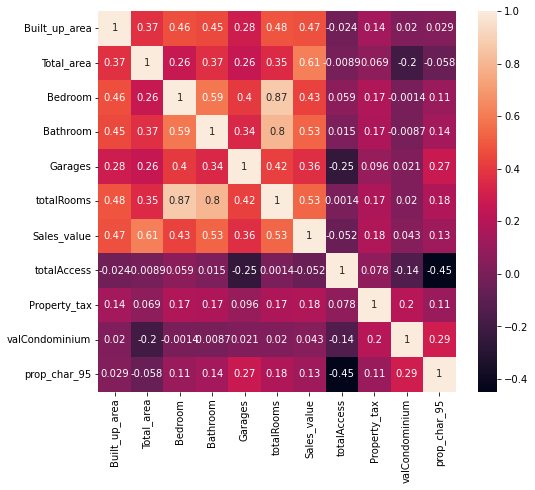

In [25]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Observation
* from above scatterplot and corelation matrix we found that there is a less co-relation between 
* Hence ,Dropping Total access,property tax and val condominium.

In [26]:
df.drop(columns=[ 'totalAccess','Property_tax','valCondominium'],inplace=True)

In [27]:
df.head(2)

,Category,Condominium,District,Street_name,Subcategory,Built_up_area,Total_area,Bedroom,Bathroom,Garages,totalRooms,Sales_value,prop_char_95
0,Casas,spazio mont royal,núcleo residencial silvio vilari,rua vivaldo lanzoni,Padrão,237.0,250.0,4.0,2.0,2.0,6.0,585000.0,47.81
1,Casas,condomínio village damha iv,village damha iv,avenida brasilino damha,Padrão,180.0,299.0,3.0,4.0,2.0,6.0,1150000.0,47.81


In [28]:
df.shape

(6548, 13)

## Continous target variable vs categorical predictor variable

#### Category columns

In [29]:
df['Category'].value_counts()

Casas           3008
Apartamentos    2016
Terreno         1127
Comercial        238
Rural            156
Industrial         3
Name: Category, dtype: int64

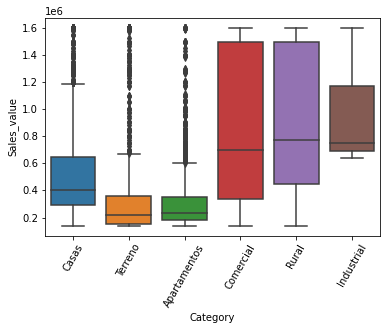

In [30]:
sns.boxplot(data=df , x='Category' , y='Sales_value')
plt.xticks(rotation=60)
plt.show()

#### Subcategory column

In [31]:
df['Subcategory'].value_counts()/len(df)*100

Padrão                   73.213195
Condomínio               10.491753
Sobrado                   2.580941
Lote                      1.802077
Comercial                 1.771533
Chácara                   1.542456
Residencial               1.175932
Kitnet                    0.962126
Salão                     0.885767
Sala                      0.748320
Galpão                    0.656689
Barracão                  0.610874
Área                      0.595602
Cobertura                 0.488699
Prédio                    0.412340
Garagem                   0.305437
Sítio                     0.244349
Sobrado Condomínio        0.213806
Chácara em condomínio     0.213806
Duplex                    0.183262
Loja                      0.167990
Área de Lazer             0.137447
Ponto                     0.122175
Studio                    0.106903
Edícula                   0.091631
Fazenda                   0.076359
Garden                    0.045816
Pesqueiro                 0.030544
Industrial          

In [32]:
#since there are many values so to avoid sparse matrix we have to clubb the data
subcat=pd.DataFrame(df['Subcategory'].value_counts()/len(df)*100)
subcat.reset_index()

repl_subcat=subcat[subcat.Subcategory<=10].index

df['Subcategory']=df['Subcategory'].replace(repl_subcat,'Others')

In [33]:
df['Subcategory'].value_counts()

Padrão        4794
Others        1067
Condomínio     687
Name: Subcategory, dtype: int64

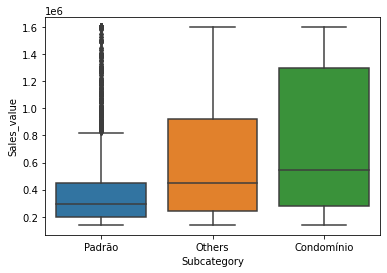

In [34]:
sns.boxplot(data=df , x='Subcategory' , y='Sales_value')
plt.show()

In [35]:
#Anova
#checking for ANOVA
sub_category_=df.groupby(['Subcategory'])['Sales_value'].apply(list)

f_value,p_value=f_oneway(*sub_category_)
print(f_value,p_value)

461.8580239739025 2.3279115652772074e-188


Subcategory column is selected

## Condominium

In [36]:
df['Condominium'].value_counts()

spazio mont royal                     3768
condomínio recanto do sabiá             52
residencial artemísia                   42
condomínio mont park                    40
residencial portal do mediterrâneo      39
                                      ... 
edifício abrahão bagnato                 1
edifício são conrado                     1
edifício gadu 1                          1
edificio irene                           1
edifício alice honce mitre               1
Name: Condominium, Length: 464, dtype: int64

### District

In [37]:
dis_df=pd.DataFrame(df['District'].value_counts())
dis_df.reset_index()

,index,District
0,centro,479
1,santa felicia,225
2,parque faber castell,210
3,cidade jardim,169
4,jardim são carlos,156
...,...,...
240,nossa senhora de fatina,1
241,vila max,1
242,residencial itatiaia,1
243,vila alpes,1


In [38]:
repl_dis=dis_df[dis_df.District<=150].index
repl_dis

Index(['vila prado', 'jardim ipanema', 'parque tecnológico damha',
       'recreio são judas tadeu', 'jardim embaré', 'jardim paraíso',
       'residencial samambaia', 'distrito industrial miguel abdelnur',
       'jardim lutfalla', 'parque arnold schimidt',
       ...
       'vila sonia', 'arace de santo antonio', 'uirapuru',
       'jardim santa helena', 'jd botafogo', 'nossa senhora de fatina',
       'vila max', 'residencial itatiaia', 'vila alpes', 'planalto paraiso'],
      dtype='object', length=238)

In [39]:
#df['District']=df['District'].replace(repl_dis,'Others')
df['District'].value_counts()

centro                     479
santa felicia              225
parque faber castell       210
cidade jardim              169
jardim são carlos          156
                          ... 
nossa senhora de fatina      1
vila max                     1
residencial itatiaia         1
vila alpes                   1
planalto paraiso             1
Name: District, Length: 245, dtype: int64

In [40]:
#Anova
#checking for ANOVA
dis_anova=df.groupby(['District'])['Sales_value'].apply(list)

f_value,p_value=f_oneway(*dis_anova)
print(f_value,p_value)

17.455960581734658 0.0


In [41]:
#District is selected

In [42]:
df.head(5)

,Category,Condominium,District,Street_name,Subcategory,Built_up_area,Total_area,Bedroom,Bathroom,Garages,totalRooms,Sales_value,prop_char_95
0,Casas,spazio mont royal,núcleo residencial silvio vilari,rua vivaldo lanzoni,Padrão,237.0,250.0,4.0,2.0,2.0,6.0,585000.0,47.81
1,Casas,condomínio village damha iv,village damha iv,avenida brasilino damha,Padrão,180.0,299.0,3.0,4.0,2.0,6.0,1150000.0,47.81
2,Terreno,spazio mont royal,vila são josé,rua hipólito josé da costa,Others,147.8,125.0,2.0,2.0,1.0,3.0,150000.0,47.81
3,Apartamentos,edifício mont d'oro,residencial monsenhor romeu tortorelli,avenida joão stella,Padrão,147.8,42.0,2.0,1.0,1.0,2.0,180000.0,42.00
4,Casas,spazio mont royal,jardim tangará,rua ilton resitano,Padrão,111.0,125.0,2.0,2.0,2.0,3.0,290000.0,47.81


In [43]:
df.shape

(6548, 13)

In [44]:
# Introduce a new column called Address
df['Address'] = df['District'] + df['Street_name']+df['Condominium']
df.shape

(6548, 14)

In [45]:
# Drop the three columns
df=df.drop(columns=['District', 'Street_name', 'Condominium'])
df.shape

(6548, 11)

In [46]:
df.to_csv('sale_saocarlos_preprocessed.csv', index=False)

In [47]:
df.head(5)

,Category,Subcategory,Built_up_area,Total_area,Bedroom,Bathroom,Garages,totalRooms,Sales_value,prop_char_95,Address
0,Casas,Padrão,237.0,250.0,4.0,2.0,2.0,6.0,585000.0,47.81,núcleo residencial silvio vilarirua vivaldo la...
1,Casas,Padrão,180.0,299.0,3.0,4.0,2.0,6.0,1150000.0,47.81,village damha ivavenida brasilino damhacondomí...
2,Terreno,Others,147.8,125.0,2.0,2.0,1.0,3.0,150000.0,47.81,vila são josérua hipólito josé da costaspazio ...
3,Apartamentos,Padrão,147.8,42.0,2.0,1.0,1.0,2.0,180000.0,42.00,residencial monsenhor romeu tortorelliavenida ...
4,Casas,Padrão,111.0,125.0,2.0,2.0,2.0,3.0,290000.0,47.81,jardim tangarárua ilton resitanospazio mont royal


### Create the train_test_split

In [48]:
X=df.drop(columns=['Sales_value'])
y=df[['Sales_value']]

In [49]:
num_columns = X.select_dtypes(include=['float']).columns.tolist()

# Get a list of column names with object (categorical) data types
cat_columns = X.select_dtypes(include=['object']).columns.tolist()

# Now you have lists of numerical and categorical column names
print("Numerical Columns:", num_columns)
print("Categorical Columns:", cat_columns)

Numerical Columns: ['Built_up_area', 'Total_area', 'Bedroom', 'Bathroom', 'Garages', 'totalRooms', 'prop_char_95']
Categorical Columns: ['Category', 'Subcategory', 'Address']


In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Create the column transformer

In [51]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define feature selection method
feature_selector = SelectFromModel(xgb.XGBRegressor(), max_features=100)  

# Define preprocessing steps
# You will define which columns to scale and one-hot encode later in the ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),  # num_columns should be a list of numerical column names
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)   # cat_columns should be a list of categorical column names
    ])

# Create a combined preprocessing and feature selection pipeline
combined_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('feature_selection', feature_selector)])

In [52]:
# Apply the transformation to the data
X_train_tran = transformer.fit_transform(X_train)
X_test_tran = transformer.transform(X_test)

In [53]:
X_train_tran

<4911x1766 sparse matrix of type '<class 'numpy.float64'>'
	with 49110 stored elements in Compressed Sparse Row format>

In [54]:
# Note X_train_tran, X_test_tran are sparse matrices and so we create the dataframe
column_names = transformer.get_feature_names_out()
X_train_tran_df = pd.DataFrame.sparse.from_spmatrix(X_train_tran, columns=column_names)
X_test_tran_df = pd.DataFrame.sparse.from_spmatrix(X_test_tran, columns=column_names)

In [55]:
len(column_names)

1766

In [56]:
# Fit and transform your data with the combined pipeline
preprocessed_data = combined_pipeline.fit_transform(X_train, y_train)

### Save the pipeline as a preprocessor

In [57]:
import joblib

# Save the combined_pipeline in a pickle file
joblib.dump(combined_pipeline, 'combined_pipeline.pkl')

['combined_pipeline.pkl']

In [58]:
importance_scores = combined_pipeline.named_steps['feature_selection'].estimator_.feature_importances_

# Create a list of feature names to associate with the importances 
feature_names =combined_pipeline.get_feature_names_out()

# Sort the feature importances and feature names together
sorted_importances, sorted_feature_names = zip(*sorted(zip(importance_scores, feature_names), reverse=True))

In [59]:
len(feature_names)

100

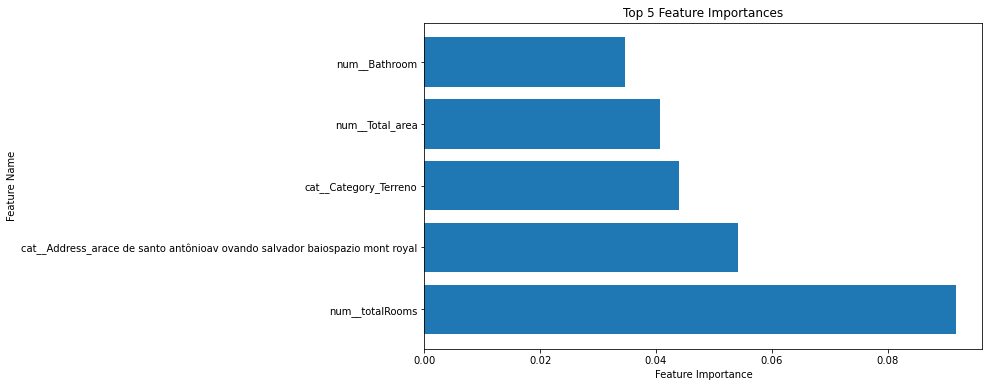

In [60]:
# Select the top 5 features
top_importances = sorted_importances[:5]
top_feature_names = sorted_feature_names[:5]

# Create a bar plot to visualize the top feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, tick_label=top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 5 Feature Importances')
plt.show()

In [61]:
selected_feature_indices = combined_pipeline.named_steps['feature_selection'].get_support(indices=True)

# Select only the top 100 features from X_train_tran
X_train_scaled = X_train_tran[:, selected_feature_indices]

X_test_scaled= X_test_tran[:, selected_feature_indices]

In [62]:
X_train_scaled_df = pd.DataFrame.sparse.from_spmatrix(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame.sparse.from_spmatrix(X_test_scaled, columns=feature_names)

In [63]:
X_train_scaled.shape, X_test_scaled.shape

((4911, 100), (1637, 100))

In [64]:
X_train_scaled_df.head()

,num__Built_up_area,num__Total_area,num__Bedroom,num__Bathroom,num__Garages,num__totalRooms,num__prop_char_95,cat__Category_Apartamentos,cat__Category_Casas,cat__Category_Comercial,...,cat__Address_vila boa vistarua luiz carlos de arruda mendesspazio mont royal,cat__Address_vila boa vistarua pedro josé netospazio mont royal,cat__Address_vila brasíliarua francisco cassiano lopesspazio mont royal,cat__Address_vila celinarua rotary clubspazio mont royal,cat__Address_vila fariarua treze de maiospazio mont royal,cat__Address_vila lutfallarua rocha pombospazio mont royal,cat__Address_vila marigorua elisa lopes de meloedifício residencial le petit,cat__Address_vila monteirorua dona alexandrinaspazio mont royal,cat__Address_vila monteirorua são joaquimspazio mont royal,cat__Address_vila neryav. capitão luiz brandãospazio mont royal
0,-0.084103,-0.834131,0.903914,1.257532,-1.351803,0.802916,1.079849,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.084103,-0.242729,-0.421197,1.257532,-0.401516,0.000327,2.428956,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.084103,-0.390579,0.903914,0.136301,-1.351803,0.802916,2.428956,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.084103,-0.242729,-0.421197,-0.984930,-0.401516,-0.802263,0.362124,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.504451,-0.982159,0.903914,0.136301,2.449344,0.000327,0.081960,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Multiple Regression model and Model Development

In [65]:
# Import Classifiers
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

#import the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
models={'LinearRegression': LinearRegression(),
        'LassoRegressor':Lasso(max_iter=10000),
        'RidgeRegressor':Ridge(max_iter=10000),
        'ADABoost': AdaBoostRegressor(),
        'XGBoost': xgb.XGBRegressor(),
        'DTR':DecisionTreeRegressor(),
        'SVR': SVR(),
        'RFR': RandomForestRegressor()}

In [67]:
# Train multiple models
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_scaled)
    r2 = model.score(X_test_scaled, y_test)
    
    
    model_list.append(list(models.keys())[i])
    r2_list.append(r2)
    
# Find the index of the model with the best R2 score
best_index = r2_list.index(max(r2_list))

# Print the model with the best accuracy
print("The model with the best R2 score is:", model_list[best_index])
print("R2 score:", r2_list[best_index])    

The model with the best R2 score is: XGBoost
R2 score: 0.7619234858695371


### Let us check how does XGBoost works on GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7, 9],
              'n_estimators' : [100, 150, 200]}


# Create a Random Forest Regressor
model = xgb.XGBRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Print the best estimator and corresponding R2 score
print("Best estimator:", grid_search.best_estimator_)
print("Best R2 score:", grid_search.best_score_)

Best estimator: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
Best R2 score: 0.7341015958423835


In [69]:
xg=grid_search.best_estimator_

y_pred=xg.predict(X_test_scaled)

In [70]:
#Calculate the mean squared error on the original scale
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 112467.74
Mean squared error: 35723592574.00
Root mean squared error: 189006.86


In [71]:
print("Train R2 Score : ", xg.score(X_train_scaled, y_train))
print("Test R2 Score  : ", xg.score(X_test_scaled, y_test))

Train R2 Score :  0.8843671179751255
Test R2 Score  :  0.7604490418820204


In [72]:
def adjR2(a, b):
    r2 = xg.score(a, b)
    n = a.shape[0]
    p = a.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

In [73]:
print("Adjusted R2 Score : ", adjR2(X_train_scaled, y_train))

Adjusted R2 Score :  0.8819631079538183


### Save the model in a Pickle file

In [74]:
# Best model is stored in 'xg' after GridSearchCV
joblib.dump(xg, 'best_model.pkl')

['best_model.pkl']

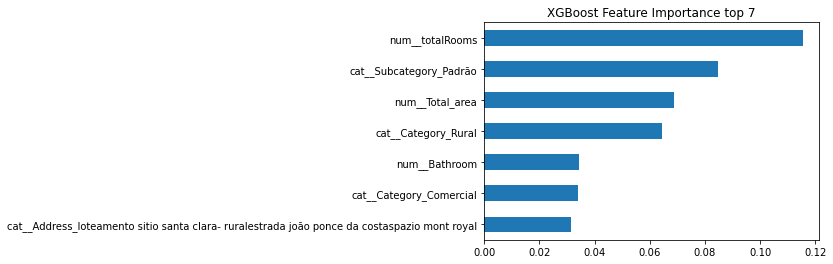

In [75]:
# Feature importance in XG Boost
feat_importances = pd.Series(xg.feature_importances_, index=feature_names)
f=feat_importances.nlargest(7).sort_values(ascending=True)
f.plot(kind='barh')
plt.title('XGBoost Feature Importance top 7')
plt.show()

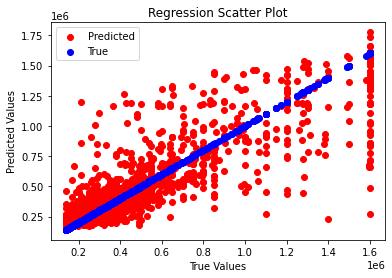

In [76]:
plt.scatter(y_test, y_pred, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='blue', label='True')


# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Scatter Plot')

# Show the plot
plt.legend()
plt.show()

In [77]:
# Create a dataframe for the Actual Price and the Prediction price
df_preds = pd.DataFrame({'Actual_price': y_test.squeeze(), 'Pred_price': y_pred.squeeze()})
df_preds.head()

,Actual_price,Pred_price
2916,180000.0,202160.562500
3544,220000.0,176234.390625
4126,500000.0,687471.187500
239,290000.0,238472.062500
334,586500.0,455394.187500


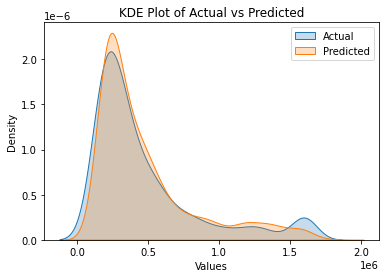

In [78]:
# Create a KDE plot for y_actual
sns.kdeplot('Actual_price', label='Actual', fill=True, data=df_preds)

# Create a KDE plot for y_pred
sns.kdeplot('Pred_price', label='Predicted', fill=True, data=df_preds)

# Add labels and a legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs Predicted')
plt.legend()

# Display the plot
plt.show()

### Plot the learning curves

In [79]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(estimator=xg, X=X_train_scaled, y=y_train,
                                                  scoring = 'r2', cv=5, train_sizes=[100,1000,3928])

In [80]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

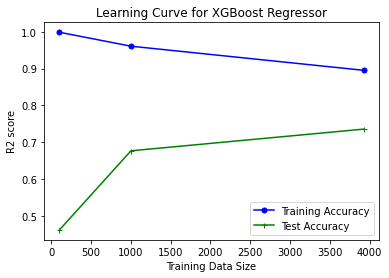

In [81]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, label='Test Accuracy')
plt.title('Learning Curve for XGBoost Regressor')
plt.xlabel('Training Data Size')
plt.ylabel('R2 score')
plt.legend(loc='lower right')
plt.show()

### So we have overfitting issues in the model.